In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras.losses as losses
import numpy as np

2023-05-05 13:48:28.814245: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 13:48:28.870866: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 13:48:28.872190: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 13:48:31.049014: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## UPAE

In [1]:
#run UPAE
%run main.py --u

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-06 21:23:44.892815: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 21:23:45.005565: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 21:23:45.007113: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 21:23:46.425733: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:10<00:00, 57.19it/s]




Processing validation images



100%|██████████| 78/78 [00:01<00:00, 66.89it/s]



Processing testing images




100%|██████████| 858/858 [00:14<00:00, 58.85it/s]




Training AE model


2023-05-06 21:24:19.876991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


UPAE


2023-05-06 21:24:20.359178: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-05-06 21:24:20.429483: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-05-06 21:24:20.449917: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.


Decoder


2023-05-06 21:24:20.596140: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.
2023-05-06 21:24:20.647652: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 33554432 exceeds 10% of free system memory.


UPAE Training
UPAE Training
10/10 [==============================] - 26s 2s/step - mse_loss: : 10636.6421 - loss1: : 10636.4905 - loss2: : 0.1516 - binary_crossentropy: : 2616249.1818
UPAE Validation
2/2 [==============================] - 1s 181ms/step - mse_loss: : 7278.1854 - loss1: : 7278.1795 - loss2: : 0.0058 - binary_crossentropy: : 3225740.3333


In [ ]:
#tensorboard will show trends in precision, recall, etc per epochs
#tensorboard to be opened in a browser using link 
%load_ext tensorboard
%tensorboard --logdir logs/fit

### Testing

In [3]:
#testing using testing set
input_images= image_datasets[2] 
generated = model.predict(input_images)
generated = np.array(generated)

In [4]:
#getting mean reconstruction error score for the images tested
re_score = losses.mean_squared_error(input_images, generated)
re_score = np.mean(re_score)
print("reconstruction error score:", re_score)

reconstruction error score: 6659.8564


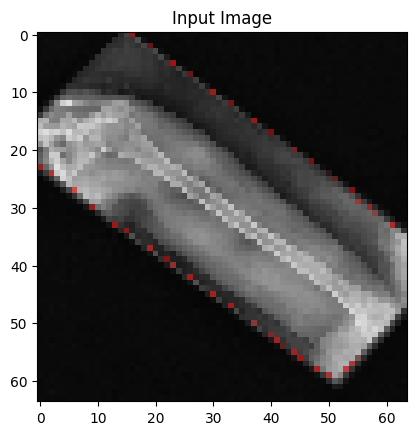

In [5]:
#input image
plt.imshow(image_datasets[2][4])
plt.title("Input Image")
plt.show()

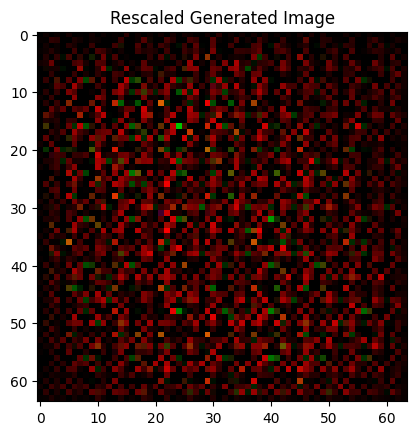

In [6]:
#rescaled generated image
generated_rescaled = (generated[0] - generated[0].min()) / (generated[0].max() - generated[0].min())
plt.imshow(generated_rescaled.reshape(64,64,3))
plt.title("Rescaled Generated Image")
plt.show()

## Vanilla AE

In [1]:
%run main.py 

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-06 22:30:13.399575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 22:30:13.454783: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 22:30:13.455910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 22:30:14.543291: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:11<00:00, 54.03it/s]




Processing validation images



100%|██████████| 78/78 [00:01<00:00, 47.86it/s]




Processing testing images



100%|██████████| 858/858 [00:15<00:00, 57.00it/s]




Training AE model


2023-05-06 22:30:47.732992: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Decoder
Vanilla Loss
Vanilla Loss
10/10 [==============================] - 28s 2s/step - mse_loss: 7242.0550
Vanilla Validation
2/2 [==============================] - 2s 215ms/step - mse_loss: 6933.5456
